In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


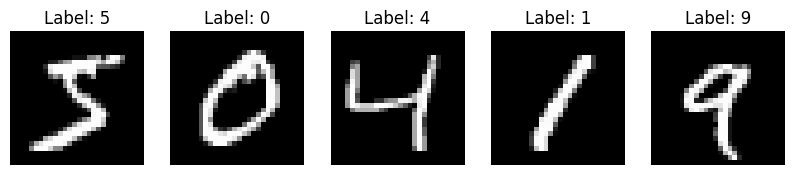

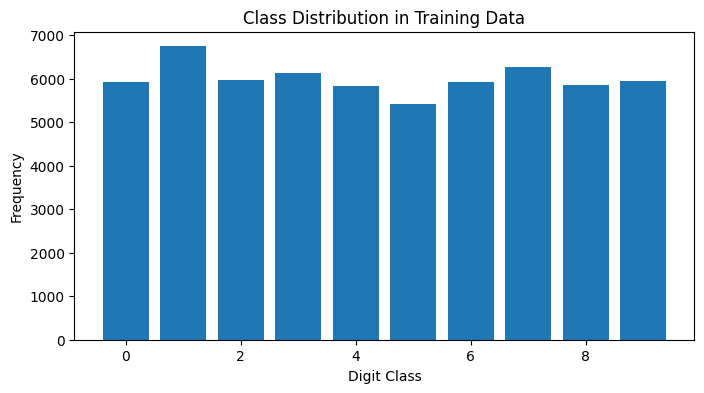

In [3]:
# Visualize some digits
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Label: {np.argmax(y_train[i])}")

# Check class distribution
class_counts = np.sum(y_train, axis=0)
plt.figure(figsize=(8, 4))
plt.bar(range(10), class_counts)
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in Training Data")
plt.show()


## **Model Building**
**1. Simple Dense Neural Network**

In [5]:
# Build the model
dnn_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
dnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
dnn_history = dnn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8643 - loss: 0.4829 - val_accuracy: 0.9523 - val_loss: 0.1683
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9610 - loss: 0.1397 - val_accuracy: 0.9673 - val_loss: 0.1149
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9739 - loss: 0.0909 - val_accuracy: 0.9714 - val_loss: 0.0960
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9805 - loss: 0.0672 - val_accuracy: 0.9732 - val_loss: 0.0878
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9862 - loss: 0.0470 - val_accuracy: 0.9711 - val_loss: 0.0942
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9891 - loss: 0.0377 - val_accuracy: 0.9762 - val_loss: 0.0863
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9917 - loss: 0.0280 - val_accuracy: 0.9725 - val_loss: 0.0912
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0235 - 

**2. Convolutional Neural Network**

In [6]:
# Build the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8126 - loss: 0.5812 - val_accuracy: 0.9802 - val_loss: 0.0637
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9617 - loss: 0.1243 - val_accuracy: 0.9875 - val_loss: 0.0452
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9743 - loss: 0.0870 - val_accuracy: 0.9887 - val_loss: 0.0386
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9776 - loss: 0.0711 - val_accuracy: 0.9892 - val_loss: 0.0376
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9807 - loss: 0.0640 - val_accuracy: 0.9896 - val_loss: 0.0377
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9834 - loss: 0.0559 - val_accuracy: 0.9899 - val_loss: 0.0344
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0519 - val_accuracy: 0.9908 - val_loss: 0.0331
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9854 - loss: 0.0487 -

## Hyperparameter Tuning
**Using RandomizedSearchCV for parameter tuning.**

In [9]:
# Define custom wrapper for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn, optimizer='adam', dropout_rate=0.5, batch_size=32, epochs=10):
        self.build_fn = build_fn
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def fit(self, X, y):
        self.model = self.build_fn(optimizer=self.optimizer, dropout_rate=self.dropout_rate)
        self.model.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)

    def predict_proba(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        return self.model.evaluate(X, y, verbose=0)[1]

# Define the CNN model function
def build_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model
model = KerasClassifierWrapper(build_fn=build_model)

# Define hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.25, 0.5],
    'batch_size': [32, 64],
    'epochs': [5,6]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, verbose=1)

# Assuming `X_train` and `y_train` are already preprocessed
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Hyperparameters: {'optimizer': 'rmsprop', 'epochs': 6, 'dropout_rate': 0.25, 'batch_size': 32}


In [11]:
best_model = random_search.best_estimator_
# Predict on the test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with highest probability
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [14]:
test_accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.2f}")


Test Accuracy: 0.99


In [15]:
# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [17]:
# Generate a confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred_classes)
conf_matrix


Confusion Matrix:


array([[ 976,    0,    0,    0,    0,    0,    1,    2,    1,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   2,    4, 1017,    0,    1,    0,    1,    7,    0,    0],
       [   0,    0,    5, 1001,    0,    2,    0,    1,    1,    0],
       [   0,    0,    0,    0,  973,    0,    1,    0,    2,    6],
       [   1,    0,    0,    5,    0,  884,    1,    1,    0,    0],
       [   0,    2,    0,    0,    1,    1,  953,    0,    1,    0],
       [   0,    3,    1,    0,    0,    0,    0, 1022,    1,    1],
       [   1,    1,    2,    2,    0,    0,    0,    2,  963,    3],
       [   0,    1,    1,    0,    3,    2,    0,    6,    1,  995]])

## **Testing the CNN Model**

In [18]:
# Predict on the test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with highest probability
y_true = np.argmax(y_test, axis=1)  # Get the true labels

# Calculate test accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

test_accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [19]:
# Generate a confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print(conf_matrix)


Confusion Matrix:
[[ 976    0    0    0    0    0    1    2    1    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   2    4 1017    0    1    0    1    7    0    0]
 [   0    0    5 1001    0    2    0    1    1    0]
 [   0    0    0    0  973    0    1    0    2    6]
 [   1    0    0    5    0  884    1    1    0    0]
 [   0    2    0    0    1    1  953    0    1    0]
 [   0    3    1    0    0    0    0 1022    1    1]
 [   1    1    2    2    0    0    0    2  963    3]
 [   0    1    1    0    3    2    0    6    1  995]]


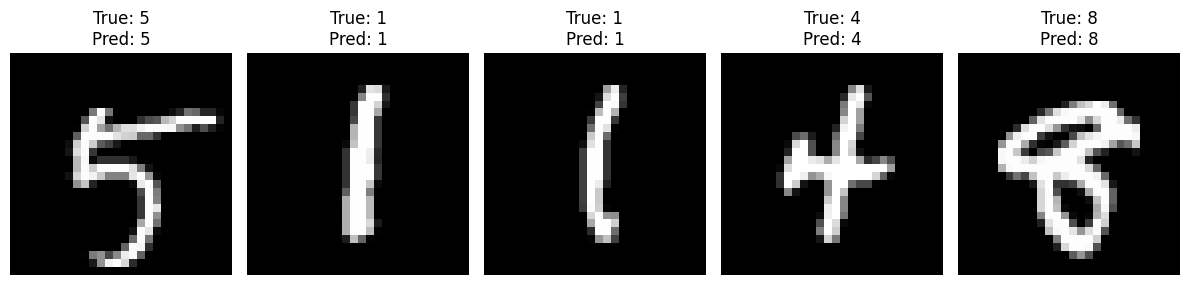

In [20]:
# Visualize a few test images along with their predictions
def visualize_predictions(X_test, y_true, y_pred_classes, num_samples=5):
    indices = np.random.choice(range(len(X_test)), num_samples, replace=False)
    plt.figure(figsize=(12, 6))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[idx]}\nPred: {y_pred_classes[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
visualize_predictions(X_test, y_true, y_pred_classes)